In [1]:
# To get data (looking at images here):
# 1. Download images manually
# 2. Kaggle.com
# 3. Build image web crawler
# 4. Use Python libraries to scrape the images  this is the method used here using the bing-image-downlaoder library

In [2]:
!pip install bing-image-downloader

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [9]:
from bing_image_downloader import downloader

In [11]:
downloader.download("pigeon", limit = 20,output_dir="images", adult_filter_off=True)

[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/pigeon


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://fromhousetohomeblog.files.wordpress.com/2011/07/pigeons.jpg
[Error]Invalid image, not saving http://fromhousetohomeblog.files.wordpress.com/2011/07/pigeons.jpg

[!] Issue getting: http://fromhousetohomeblog.files.wordpress.com/2011/07/pigeons.jpg
[!] Error:: Invalid image, not saving http://fromhousetohomeblog.files.wordpress.com/2011/07/pigeons.jpg

[%] Downloading Image #1 from https://www.animalfunfacts.net/images/stories/photos/birds/pigeons/pigeon/pigeon_l.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/41200000/Pigeons-pigeons-41211472-1024-768.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-9lMC-dfYJ0A/UoyRuPi7fkI/AAAAAAAAJls/ISeov-rNzsU/s1600/Pigeon+Bird+New+Wallpaper+08.jpg
[%] File D

In [46]:
downloader.download("daffodil", limit = 20,output_dir="images", adult_filter_off=True)

[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/daffodil


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://images5.fanpop.com/image/photos/30700000/Daffodil-flowers-30709818-1600-1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.wallpapers13.com/wp-content/uploads/2015/12/Daffodils-flowers-23456-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-cjbmx8mTOnI/TlYtpDQiNGI/AAAAAAAAL4k/du0NGx13Qr8/s1600/first+daffodil+flower+august+19th+2011.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.wallpapers13.com/wp-content/uploads/2015/12/Daffodils-flowers-3789.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images2.pics4learning.com/catalog/d/daffodil.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.flowermeaning.com/flower-pics/Daffodil-1.jpg
[%] File Downloaded !

[%

In [24]:
downloader.download("fox", limit = 20,output_dir="images", adult_filter_off=True)

[%] Downloading Images to /home/den/Google Drive/2. Projects/P:wild_life_classifier/wild_life_classifier/images/fox


[!!]Indexing page: 1

[%] Indexed 18 Images on Page 1.


[%] Downloading Image #1 from https://3.bp.blogspot.com/-5UDtiW8W1_w/T2ra_oHrDnI/AAAAAAAAC2s/B4217gUB8wY/s1600/fox+7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/40000000/FOX-fox-40076151-960-633.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://animalia-life.com/data_images/fox/fox2.jpg
[!] Issue getting: https://animalia-life.com/data_images/fox/fox2.jpg
[!] Error:: <urlopen error [SSL: WRONG_SIGNATURE_TYPE] wrong signature type (_ssl.c:1131)>
[%] Downloading Image #3 from http://images1.fanpop.com/images/photos/1300000/Foxes-fox-1326189-545-707.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i1.treknature.com/photos/1652/fox1.jpg
[!] Issue getting: https://i1.treknature.com/photos/1652/fox1.jpg
[!] Error:: HTTP Error 403: Forbidd

In [34]:
# Preprocessing
# 1. Resizing
# 2. Flattening


import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

/home/den/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


time: 1 s (started: 2022-09-14 17:24:30 +01:00)


In [43]:
targets = []
images = []
flat_data = []

DATADIR = 'images'
CATEGORIES = ['pigeon','daffodil','fox']

In [47]:
for category in CATEGORIES:
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array, (150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        targets.append(class_num)

flat_data = np.array(flat_data)
target = np.array(targets)
images = np.array(images)

In [48]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(flat_data,targets,test_size=0.3,random_state=42)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
                {'C':[1,10,100,1000],'kernel':['linear']},
                {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
# clf = GridSearchCV(svc,param_grid,verbose=2,n_jobs=1)
# clf.fit(X_train,y_train,)

In [57]:
import pickle
pickle.dump(clf, open("clf.p", 'wb'))

# To load a 
# model = pickle.load(open('img_model.p','rb'))

In [75]:
# Testing a brand new Image 
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)

Enter your URLhttps://www.ftd.com/blog/wp-content/uploads/2016/05/hero-daffodil-meanings-720x500.jpg
(500, 720, 3)


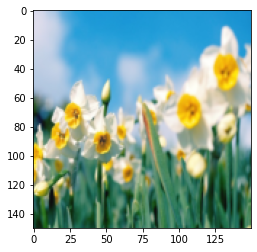

In [76]:
plt.imshow(img_resized)

In [77]:
y_out = clf.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

PREDICTED OUTPUT: daffodil


In [80]:
# Deployment:
# 1. WebPage - HTLM/CSS/JS - Flask/Django
# 2. WebApp - Streamlit/Dash
# 3. Mobile App - Kotlin/Java

In [4]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title('Image Classifier')
st.text('Upload the Image')
model = pickle.loaD(open("clf.p", rb))

uploaded_file = st.file_uploader("Choose an image ...", type ="jpg")
if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption = 'Uploaded Image')
    

Overwriting app.py


In [3]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.20.10.3:8502

^C
  Stopping...
